In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

<h3> The goal is to predict the Weight of three new persons knowing his/her Height</h3>

In [2]:
# Training dataset
Height = (1.47, 1.50, 1.55, 1.60, 1.63, 1.68, 1.73, 1.75, 1.78, 1.81)
Weight = (45, 53, 55, 61, 59, 66, 70, 75, 76, 83)

# Create Dataframe
df = pd.DataFrame({"Height":Height, "Weight":Weight})
df

,Height,Weight
0,1.47,45
1,1.50,53
2,1.55,55
3,1.60,61
4,1.63,59
5,1.68,66
6,1.73,70
7,1.75,75
8,1.78,76
9,1.81,83


<Axes: xlabel='Height', ylabel='Weight'>

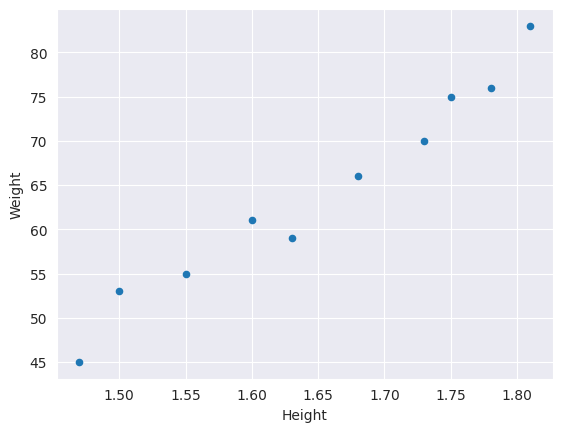

In [3]:
# We can observe the linearity in between these two variables
df.plot.scatter(x="Height", y="Weight")

In [4]:
# We train the full (100%) training dataset

X_train = df[["Height"]]
y_train = df[["Weight"]]

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
# We can add, to this Dataframe, the predicted values for Weight column from model
df['Weight_pred'] = model.predict(X_train)
df

,Height,Weight,Weight_pred
0,1.47,45,46.723197
1,1.50,53,49.652665
2,1.55,55,54.535110
3,1.60,61,59.417555
4,1.63,59,62.347022
5,1.68,66,67.229467
6,1.73,70,72.111912
7,1.75,75,74.064890
8,1.78,76,76.994357
9,1.81,83,79.923824


<h3> Now, we use new dataset for Heights </h3>

In [6]:
# Create new Dataframe with the new input heights for three persons
new_person_Heights = (1.70, 1.74, 1.80)
new_df = pd.DataFrame({"Height": new_person_Heights})
new_df

,Height
0,1.70
1,1.74
2,1.80


In [7]:
# We can add the predicted values for Weight of these new persons to the new Dataframe
new_df['Weight_pred'] = model.predict(new_df[['Height']])

In [8]:
# Remember that this model is a simple (2D) linear equation (y = mx + b)
# It is possible also write this model as an equation using the training data

# In this way, we can predict these new Weights by this time using directly the linear equation.

new_df['Weight_pred_eq'] = model.coef_*new_df[["Height"]] + model.intercept_
new_df

,Height,Weight_pred,Weight_pred_eq
0,1.70,69.182445,69.182445
1,1.74,73.088401,73.088401
2,1.80,78.947335,78.947335


<h3> We can observe that the columns Weight_pred and Weight_pred_eq work equal. </h3>
<h3> Finally, we can plot the full dataset (training + test samples) and the model (straight line).

In [9]:
# Calculate the score (R-squared) of the model by using the training dataset
score = model.score(X_train, y_train)
score

0.9640324294062317

<Axes: xlabel='Height', ylabel='Weight_pred'>

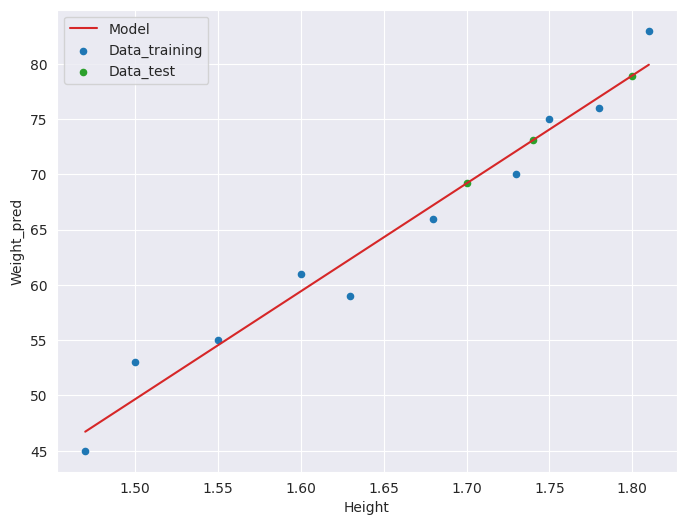

In [10]:
ax = df.plot.line(x="Height", y="Weight_pred", color='tab:red',  label='Model')
df.plot.scatter(x="Height", y="Weight", ax=ax, color='tab:blue', label='Data_training', figsize=(8, 6))
new_df.plot.scatter(x="Height", y="Weight_pred", ax=ax, color='tab:green', label='Data_test', figsize=(8, 6))

<h3> As expected, the predicted values will be on the line (model).